In [1]:
%%capture

!pip install tensorflow

In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

In [3]:
# Load EEG data from CSV file
csv_file_path = '/content/Epileptic Seizure Recognition.csv'  # Replace with the actual path to your EEG data CSV file
eeg_data = pd.read_csv(csv_file_path)

In [4]:
print(eeg_data.keys())

Index(['Unnamed', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       ...
       'X170', 'X171', 'X172', 'X173', 'X174', 'X175', 'X176', 'X177', 'X178',
       'y'],
      dtype='object', length=180)


In [5]:
X = eeg_data.iloc[:, 1:-1].values

In [6]:
X.shape

(11500, 178)

In [7]:
y = eeg_data.iloc[:,-1:].values


In [ ]:
y.shape

(11500, 1)

In [ ]:
num_classes = len(np.unique(y))

In [ ]:
print(y)

[[4]
 [1]
 [5]
 ...
 [5]
 [3]
 [4]]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,shuffle=True)
X_train.shape,y_test.shape

((8625, 178), (2875, 1))

In [9]:
# Reshape the data to comply with the 3D input shape expected by Conv1D
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [10]:
y_train=y_train-1
y_test = y_test -1

In [11]:
# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=5)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=5)

In [12]:
from tensorflow import keras
from tensorflow.keras import models, layers
# Now you can use models from keras
model = keras.models.Sequential()

In [ ]:
# Define the 1D CNN model
model = models.Sequential()
model.add(layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(178, 1)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(64, kernel_size=3, activation='relu'))
model.add(layers.GlobalAveragePooling1D())  # GlobalAveragePooling1D instead of Flatten
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 176, 32)           128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 88, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 86, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 43, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 41, 64)            12352     
                                                                 
 global_average_pooling1d (  (None, 64)               

In [16]:
from keras.layers import Conv1D, MaxPooling1D, Dropout, LSTM, Flatten, Dense, Input, Attention, Concatenate
from keras.models import Model

# Define input shape
input_shape = (178, 1)
inputs = Input(shape=input_shape)

# Attention mechanism
attention = Attention()([inputs, inputs])

# Convolutional layers
x = Conv1D(256, 3, activation='relu', padding='same')(attention)
x = MaxPooling1D(2)(x)
x = Dropout(0.2)(x)

x = Conv1D(128, 3, activation='relu', padding='same')(x)
x = MaxPooling1D(2)(x)
x = Dropout(0.2)(x)

# LSTM layers
x = LSTM(64, return_sequences=True)(x)
x = LSTM(32)(x)

x = Flatten()(x)
# Concatenate attention output before final layers
x = Concatenate()([x, Flatten()(attention)])
# Dense layers
x = Dense(250, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(5, activation='softmax')(x)

# Define model
model = Model(inputs=inputs, outputs=output)

# Compile model
#model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 178, 1)]             0         []                            
                                                                                                  
 attention_1 (Attention)     (None, 178, 1)               0         ['input_2[0][0]',             
                                                                     'input_2[0][0]']             
                                                                                                  
 conv1d_2 (Conv1D)           (None, 178, 256)             1024      ['attention_1[0][0]']         
                                                                                                  
 max_pooling1d_2 (MaxPoolin  (None, 89, 256)              0         ['conv1d_2[0][0]']      

In [17]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# Train the model
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
270/270 [==============================] - 50s 163ms/step - loss: 95.7549 - accuracy: 0.3165 - val_loss: 44.1897 - val_accuracy: 0.3937
Epoch 2/5
270/270 [==============================] - 44s 162ms/step - loss: 45.9129 - accuracy: 0.4144 - val_loss: 28.8749 - val_accuracy: 0.4261
Epoch 3/5
270/270 [==============================] - 43s 159ms/step - loss: 29.3932 - accuracy: 0.4656 - val_loss: 21.2004 - val_accuracy: 0.4553
Epoch 4/5
270/270 [==============================] - 42s 156ms/step - loss: 20.8359 - accuracy: 0.4975 - val_loss: 16.9298 - val_accuracy: 0.4873
Epoch 5/5
270/270 [==============================] - 44s 163ms/step - loss: 14.9028 - accuracy: 0.5164 - val_loss: 13.1576 - val_accuracy: 0.4835


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super(AttentionLayer, self).__init__()
        self.W = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features):
        score = tf.nn.tanh(self.W(features))
        attention_weights = tf.nn.softmax(self.V(score), axis=1)
        context_vector = attention_weights * features
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector

# Define the 1D CNN model with attention
model = models.Sequential()
model.add(layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(178, 1)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(64, kernel_size=3, activation='relu'))
model.add(layers.GlobalAveragePooling1D())  # GlobalAveragePooling1D instead of Flatten

# Add Reshape layer to ensure compatibility with Dense layer
model.add(layers.Reshape((-1, 64)))

# Add attention layer
model.add(AttentionLayer(64))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

model.summary()


Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_170 (Conv1D)         (None, 176, 32)           128       
                                                                 
 max_pooling1d_114 (MaxPool  (None, 88, 32)            0         
 ing1D)                                                          
                                                                 
 conv1d_171 (Conv1D)         (None, 86, 64)            6208      
                                                                 
 max_pooling1d_115 (MaxPool  (None, 43, 64)            0         
 ing1D)                                                          
                                                                 
 conv1d_172 (Conv1D)         (None, 41, 64)            12352     
                                                                 
 global_average_pooling1d_6  (None, 64)              

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))

Epoch 1/3
270/270 [==============================] - 6s 16ms/step - loss: 1.2948 - accuracy: 0.4916 - val_loss: 0.9450 - val_accuracy: 0.6275
Epoch 2/3
270/270 [==============================] - 5s 17ms/step - loss: 0.8513 - accuracy: 0.6335 - val_loss: 0.7542 - val_accuracy: 0.6734
Epoch 3/3
270/270 [==============================] - 5s 18ms/step - loss: 0.7239 - accuracy: 0.6770 - val_loss: 0.6808 - val_accuracy: 0.6856


In [ ]:
# Assuming you have trained your model and stored it in the variable 'model'

# Extract the weights of the dense layer before softmax activation
dense_layer_weights = model.layers[-2].get_weights()[0]

# Transpose the weights to obtain the precision matrix
precision_matrix = dense_layer_weights.T

print("Precision Matrix Shape:", precision_matrix.shape)
print("Precision Matrix:", precision_matrix)


Precision Matrix Shape: (64, 64)
Precision Matrix: [[-0.11123929  0.0880913  -0.05516335 ...  0.02665447  0.1263987
  -0.19047378]
 [ 0.20551662 -0.18344578 -0.15874344 ... -0.02858296 -0.10926165
   0.00987592]
 [ 0.17195378  0.07492115 -0.08729142 ... -0.19967133 -0.16214913
  -0.18695249]
 ...
 [-0.18667048  0.04783116 -0.07698421 ...  0.20259602  0.05327277
   0.2082126 ]
 [ 0.16389818 -0.04397346 -0.14766149 ...  0.04385184  0.08222438
  -0.18200262]
 [ 0.02913286 -0.00251348 -0.12515354 ... -0.00185968 -0.03507552
   0.03352927]]


Epoch 1/100
270/270 [==============================] - 9s 32ms/step - loss: 0.0831 - accuracy: 0.9675 - val_loss: 0.6726 - val_accuracy: 0.8181
Epoch 2/100
270/270 [==============================] - 5s 20ms/step - loss: 0.0928 - accuracy: 0.9613 - val_loss: 0.7264 - val_accuracy: 0.8115
Epoch 3/100
270/270 [==============================] - 5s 17ms/step - loss: 0.1014 - accuracy: 0.9603 - val_loss: 0.8047 - val_accuracy: 0.8101
Epoch 4/100
270/270 [==============================] - 6s 20ms/step - loss: 0.0954 - accuracy: 0.9650 - val_loss: 0.7418 - val_accuracy: 0.8094
Epoch 5/100
270/270 [==============================] - 4s 15ms/step - loss: 0.0801 - accuracy: 0.9694 - val_loss: 0.7524 - val_accuracy: 0.8177
Epoch 6/100
270/270 [==============================] - 4s 15ms/step - loss: 0.1636 - accuracy: 0.9455 - val_loss: 0.6770 - val_accuracy: 0.8254
Epoch 7/100
270/270 [==============================] - 5s 20ms/step - loss: 0.0623 - accuracy: 0.9782 - val_loss: 0.6967 - val_accuracy:

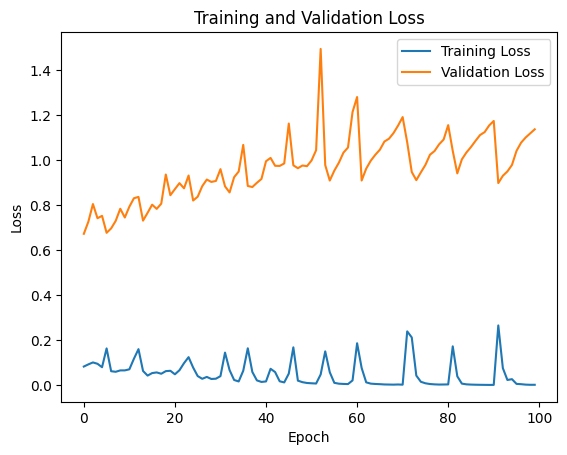

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and stored the history object
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you have your test data and true labels stored in test_data and true_labels respectively

# Assuming you have already compiled and trained your model and you have predictions stored in predicted_labels
# If not, you need to make predictions on your test data
predicted_labels = model.predict(X_test)

# Convert predicted labels to class indices (assuming one-hot encoded labels)
predicted_indices = np.argmax(predicted_labels, axis=1)

# Convert true labels to class indices (assuming one-hot encoded labels)
true_indices = np.argmax(y_test, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(true_indices, predicted_indices)

print("Confusion Matrix:")
print(conf_matrix)


90/90 [==============================] - 1s 6ms/step
Confusion Matrix:
[[576  12   0   5   0]
 [  7 396 150   1  10]
 [  1 140 406   2  19]
 [  0   3   0 506  53]
 [  0  20  24  58 486]]


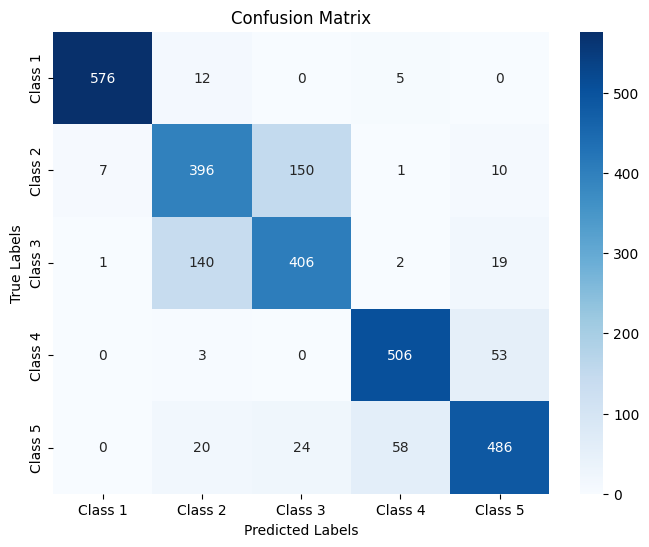

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already computed the confusion matrix as described in the previous code snippet

# Define class labels
class_labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super(AttentionLayer, self).__init__()
        self.W = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features):
        score = tf.nn.tanh(self.W(features))
        attention_weights = tf.nn.softmax(self.V(score), axis=1)
        context_vector = attention_weights * features
        return context_vector

# Define the 1D CNN model with attention
model = models.Sequential()

# Add Conv1D layer
model.add(layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(178, 1)))

# Add attention layer
model.add(AttentionLayer(32))

# Add MaxPooling1D layer
model.add(layers.MaxPooling1D(pool_size=2))

# Add remaining Conv1D layers
model.add(layers.Conv1D(64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(64, kernel_size=3, activation='relu'))
model.add(layers.GlobalAveragePooling1D())  # GlobalAveragePooling1D instead of Flatten

# Add Dense layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 176, 32)           128       
                                                                 
 attention_layer_1 (Attenti  (None, 176, 32)           1089      
 onLayer)                                                        
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 88, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_10 (Conv1D)          (None, 86, 64)            6208      
                                                                 
 max_pooling1d_7 (MaxPoolin  (None, 43, 64)            0         
 g1D)                                                            
                                                      

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))

Epoch 1/60
270/270 [==============================] - 9s 21ms/step - loss: 1.1162 - accuracy: 0.5045 - val_loss: 0.8418 - val_accuracy: 0.6445
Epoch 2/60
270/270 [==============================] - 5s 19ms/step - loss: 0.8065 - accuracy: 0.6350 - val_loss: 0.7334 - val_accuracy: 0.6563
Epoch 3/60
270/270 [==============================] - 6s 23ms/step - loss: 0.7433 - accuracy: 0.6599 - val_loss: 0.7331 - val_accuracy: 0.6605
Epoch 4/60
270/270 [==============================] - 5s 19ms/step - loss: 0.7127 - accuracy: 0.6624 - val_loss: 0.7129 - val_accuracy: 0.6623
Epoch 5/60
270/270 [==============================] - 7s 28ms/step - loss: 0.6825 - accuracy: 0.6701 - val_loss: 0.6328 - val_accuracy: 0.7005
Epoch 6/60
270/270 [==============================] - 5s 19ms/step - loss: 0.6430 - accuracy: 0.6878 - val_loss: 0.6345 - val_accuracy: 0.6883
Epoch 7/60
270/270 [==============================] - 6s 22ms/step - loss: 0.6329 - accuracy: 0.6908 - val_loss: 0.5942 - val_accuracy: 0.7078

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super(AttentionLayer, self).__init__()
        self.W = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features):
        score = tf.nn.tanh(self.W(features))
        attention_weights = tf.nn.softmax(self.V(score), axis=1)
        context_vector = attention_weights * features
        return context_vector

# Define the 1D RNN model with attention
model = models.Sequential()

# Add LSTM layer
model.add(layers.LSTM(64, return_sequences=True, input_shape=(178, 1)))  # LSTM layer with return_sequences=True to preserve temporal information

# Add attention layer
model.add(AttentionLayer(64))

# Add MaxPooling1D layer
model.add(layers.MaxPooling1D(pool_size=2))

# Add remaining LSTM layers
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.LSTM(32))  # Last LSTM layer without return_sequences=True

# Add Dense layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 178, 64)           16896     
                                                                 
 attention_layer_3 (Attenti  (None, 178, 64)           4225      
 onLayer)                                                        
                                                                 
 max_pooling1d_9 (MaxPoolin  (None, 89, 64)            0         
 g1D)                                                            
                                                                 
 lstm_4 (LSTM)               (None, 89, 64)            33024     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_16 (Dense)            (None, 64)               

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test))

Epoch 1/50
270/270 [==============================] - 60s 196ms/step - loss: 1.1946 - accuracy: 0.4394 - val_loss: 1.0413 - val_accuracy: 0.5350
Epoch 2/50
 22/270 [=>............................] - ETA: 1:24 - loss: 1.0504 - accuracy: 0.5199

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super(AttentionLayer, self).__init__()
        self.W = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features):
        score = tf.nn.tanh(self.W(features))
        attention_weights = tf.nn.softmax(self.V(score), axis=1)
        context_vector = attention_weights * features
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector

class Encoder(tf.keras.layers.Layer):
    def __init__(self, units):
        super(Encoder, self).__init__()
        self.encoder_layer = tf.keras.layers.Dense(units, activation='relu')
        self.encoder_layer = tf.keras.layers.Conv1D

    def call(self, inputs):
        return self.encoder_layer(inputs)

class Decoder(tf.keras.layers.Layer):
    def __init__(self, units):
        super(Decoder, self).__init__()
        self.decoder_layer = tf.keras.layers.Dense(units, activation='relu')

    def call(self, inputs):
        return self.decoder_layer(inputs)

# Define the 1D CNN model with attention
model = models.Sequential()
model.add(layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(178, 1)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(256, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(256, kernel_size=3, activation='relu'))
model.add(layers.GlobalAveragePooling1D())  # GlobalAveragePooling1D instead of Flatten

# Add Reshape layer to ensure compatibility with Dense layer
model.add(layers.Reshape((-1, 128)))

# Add attention layer
model.add(AttentionLayer(128))

# Add encoder layer
model.add(Encoder(64))


# Add decoder layer

model.add(Decoder(64))

# Add Dense layers
model.add(layers.Dense(64, activation='relu'))

# Add output layer
model.add(layers.Dense(5, activation='softmax'))

model.summary()


TypeError: Exception encountered when calling layer "encoder_1" (type Encoder).

in user code:

    File "<ipython-input-21-451225425213>", line 24, in call  *
        return self.encoder_layer(inputs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/dtensor/utils.py", line 96, in _wrap_function  **
        init_method(layer_instance, *args, **kwargs)

    TypeError: Conv1D.__init__() missing 1 required positional argument: 'kernel_size'


Call arguments received by layer "encoder_1" (type Encoder):
  • inputs=tf.Tensor(shape=(None, 128), dtype=float32)

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))

Epoch 1/3
270/270 [==============================] - 22s 75ms/step - loss: 1.1202 - accuracy: 0.5064 - val_loss: 0.8134 - val_accuracy: 0.6202
Epoch 2/3
270/270 [==============================] - 19s 72ms/step - loss: 0.7277 - accuracy: 0.6586 - val_loss: 0.6675 - val_accuracy: 0.6584
Epoch 3/3
270/270 [==============================] - 20s 73ms/step - loss: 0.6460 - accuracy: 0.6882 - val_loss: 0.6010 - val_accuracy: 0.7071


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super(AttentionLayer, self).__init__()
        self.W = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features):
        score = tf.nn.tanh(self.W(features))
        attention_weights = tf.nn.softmax(self.V(score), axis=1)
        context_vector = attention_weights * features
        return context_vector

# Define the 1D RNN model with attention
model = models.Sequential()

# Define the 1D CNN model with attention
model.add(layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(178, 1)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(64, kernel_size=3, activation='relu'))
model.add(layers.GlobalAveragePooling1D())  # GlobalAveragePooling1D instead of Flatten

# Add Reshape layer to ensure compatibility with Dense layer
model.add(layers.Reshape((-1, 64)))

# Add attention layer
model.add(AttentionLayer(64))

# Add remaining LSTM layers
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.LSTM(32))  # Last LSTM layer without return_sequences=True

# Add Dense layers
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 176, 32)           128       
                                                                 
 max_pooling1d_10 (MaxPooli  (None, 88, 32)            0         
 ng1D)                                                           
                                                                 
 conv1d_13 (Conv1D)          (None, 86, 64)            6208      
                                                                 
 max_pooling1d_11 (MaxPooli  (None, 43, 64)            0         
 ng1D)                                                           
                                                                 
 conv1d_14 (Conv1D)          (None, 41, 64)            12352     
                                                                 
 global_average_pooling1d_4  (None, 64)               

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
270/270 [==============================] - 13s 27ms/step - loss: 0.9689 - accuracy: 0.5997 - val_loss: 0.8230 - val_accuracy: 0.6150
Epoch 2/50
270/270 [==============================] - 5s 20ms/step - loss: 0.6451 - accuracy: 0.6842 - val_loss: 0.6004 - val_accuracy: 0.7103
Epoch 3/50
270/270 [==============================] - 6s 23ms/step - loss: 0.6026 - accuracy: 0.7053 - val_loss: 0.5800 - val_accuracy: 0.7085
Epoch 4/50
270/270 [==============================] - 5s 20ms/step - loss: 0.5798 - accuracy: 0.7148 - val_loss: 0.5826 - val_accuracy: 0.7043
Epoch 5/50
270/270 [==============================] - 7s 24ms/step - loss: 0.5721 - accuracy: 0.7192 - val_loss: 0.5849 - val_accuracy: 0.7221
Epoch 6/50
270/270 [==============================] - 6s 22ms/step - loss: 0.5581 - accuracy: 0.7223 - val_loss: 0.5443 - val_accuracy: 0.7270
Epoch 7/50
270/270 [==============================] - 6s 22ms/step - loss: 0.5312 - accuracy: 0.7390 - val_loss: 0.6003 - val_accuracy: 0.725

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super(AttentionLayer, self).__init__()
        self.W = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features):
        score = tf.nn.tanh(self.W(features))
        attention_weights = tf.nn.softmax(self.V(score), axis=1)
        context_vector = attention_weights * features
        return context_vector

# Define the 1D CNN model with attention
input_layer = layers.Input(shape=(178, 1))
conv1d_layer = layers.Conv1D(32, kernel_size=4, activation='relu')(input_layer)
attention_output = AttentionLayer(32)(conv1d_layer)
attention_output = layers.GlobalAveragePooling1D()(attention_output)  # Reshape to (None, 32)
attention_output = layers.Dense(64, activation='relu')(attention_output)  # Match the dimension
maxpooling_layer = layers.MaxPooling1D(pool_size=2)(conv1d_layer)
conv1d_layer2 = layers.Conv1D(64, kernel_size=3, activation='relu')(maxpooling_layer)
maxpooling_layer2 = layers.MaxPooling1D(pool_size=2)(conv1d_layer2)
conv1d_layer3 = layers.Conv1D(64, kernel_size=3, activation='relu')(maxpooling_layer2)
global_avg_pooling_layer = layers.GlobalAveragePooling1D()(conv1d_layer3)
dense_layer = layers.Dense(64, activation='relu')(global_avg_pooling_layer)

# Add attention layer output to the final dense layer output
concatenated_output = layers.Concatenate(axis=-1)([dense_layer, attention_output])

# Add Dense layer of size 64 before the final output
dense_layer_64 = layers.Dense(64, activation='relu')(concatenated_output)

# Final dense layer
output_layer = layers.Dense(5, activation='softmax')(dense_layer_64)

# Define the model
model = models.Model(inputs=input_layer, outputs=output_layer)

model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_19 (InputLayer)       [(None, 178, 1)]             0         []                            
                                                                                                  
 conv1d_176 (Conv1D)         (None, 175, 32)              160       ['input_19[0][0]']            
                                                                                                  
 max_pooling1d_118 (MaxPool  (None, 87, 32)               0         ['conv1d_176[0][0]']          
 ing1D)                                                                                           
                                                                                                  
 conv1d_177 (Conv1D)         (None, 85, 64)               6208      ['max_pooling1d_118[0][0

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=70, validation_data=(X_test, y_test))

Epoch 1/70
270/270 [==============================] - 8s 19ms/step - loss: 1.0287 - accuracy: 0.5579 - val_loss: 0.8125 - val_accuracy: 0.6223
Epoch 2/70
270/270 [==============================] - 5s 18ms/step - loss: 0.7056 - accuracy: 0.6742 - val_loss: 0.6604 - val_accuracy: 0.6925
Epoch 3/70
270/270 [==============================] - 6s 23ms/step - loss: 0.6472 - accuracy: 0.6939 - val_loss: 0.6073 - val_accuracy: 0.7064
Epoch 4/70
270/270 [==============================] - 6s 23ms/step - loss: 0.6046 - accuracy: 0.7154 - val_loss: 0.5759 - val_accuracy: 0.7224
Epoch 5/70
270/270 [==============================] - 6s 22ms/step - loss: 0.5780 - accuracy: 0.7271 - val_loss: 0.5497 - val_accuracy: 0.7329
Epoch 6/70
270/270 [==============================] - 5s 18ms/step - loss: 0.5557 - accuracy: 0.7316 - val_loss: 0.5269 - val_accuracy: 0.7443
Epoch 7/70
270/270 [==============================] - 6s 23ms/step - loss: 0.5400 - accuracy: 0.7414 - val_loss: 0.5955 - val_accuracy: 0.7071

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Attention, Add
from tensorflow.keras import layers, models

class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super(AttentionLayer, self).__init__()
        self.W = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features):
        score = tf.nn.tanh(self.W(features))
        attention_weights = tf.nn.softmax(self.V(score), axis=1)
        context_vector = attention_weights * features
        return context_vector

# Define the 1D CNN model with attention
input_layer = layers.Input(shape=(178, 1))
conv1d_layer = layers.Conv1D(32, kernel_size=4, activation='relu')(input_layer)
maxpooling_layer = layers.MaxPooling1D(pool_size=2)(conv1d_layer)
conv1d_layer2 = layers.Conv1D(64, kernel_size=3, activation='relu')(maxpooling_layer)

# Apply attention layer after the 2nd step
attention_output = AttentionLayer(64)(conv1d_layer2)

# Concatenate attention output with the output of the 2nd convolutional layer
concatenated_output = layers.Concatenate(axis=1)([conv1d_layer2, attention_output])

# Additional layers
maxpooling_layer2 = layers.MaxPooling1D(pool_size=2)(concatenated_output)
conv1d_layer3 = layers.Conv1D(64, kernel_size=3, activation='relu')(maxpooling_layer2)
global_avg_pooling_layer = layers.GlobalAveragePooling1D()(conv1d_layer3)
dense_layer = layers.Dense(64, activation='relu')(global_avg_pooling_layer)

# Add Dense layer of size 64 before the final output
dense_layer_64 = layers.Dense(64, activation='relu')(dense_layer)

# Final dense layer
dense_layer_64 = layers.Dense(32, activation='relu')(dense_layer_64)
output_layer = layers.Dense(5, activation='softmax')(dense_layer_64)

# Define the model
model = models.Model(inputs=input_layer, outputs=output_layer)

model.summary()


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_16 (InputLayer)       [(None, 178, 1)]             0         []                            
                                                                                                  
 conv1d_60 (Conv1D)          (None, 175, 32)              160       ['input_16[0][0]']            
                                                                                                  
 max_pooling1d_42 (MaxPooli  (None, 87, 32)               0         ['conv1d_60[0][0]']           
 ng1D)                                                                                            
                                                                                                  
 conv1d_61 (Conv1D)          (None, 85, 64)               6208      ['max_pooling1d_42[0][0]

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
270/270 [==============================] - 14s 33ms/step - loss: 1.0580 - accuracy: 0.5303 - val_loss: 0.8402 - val_accuracy: 0.6250
Epoch 2/50
270/270 [==============================] - 7s 27ms/step - loss: 0.7258 - accuracy: 0.6700 - val_loss: 0.7456 - val_accuracy: 0.6692
Epoch 3/50
270/270 [==============================] - 8s 28ms/step - loss: 0.6293 - accuracy: 0.7025 - val_loss: 0.6647 - val_accuracy: 0.6936
Epoch 4/50
270/270 [==============================] - 6s 24ms/step - loss: 0.5847 - accuracy: 0.7241 - val_loss: 0.6043 - val_accuracy: 0.7190
Epoch 5/50
270/270 [==============================] - 7s 27ms/step - loss: 0.5626 - accuracy: 0.7308 - val_loss: 0.5627 - val_accuracy: 0.7287
Epoch 6/50
270/270 [==============================] - 6s 23ms/step - loss: 0.5462 - accuracy: 0.7442 - val_loss: 0.5825 - val_accuracy: 0.7231
Epoch 7/50
270/270 [==============================] - 8s 30ms/step - loss: 0.5252 - accuracy: 0.7541 - val_loss: 0.5412 - val_accuracy: 0.755